# **Predicting SONAR Rocks Against Mines**



## **1.Introduction**
IT's all about predicting SONAR rocks against Mines with the help of Machine Learning. SONAR is an abbreviated form of Sound Navigation and Ranging. It uses sound waves to detect objects underwater. Machine learning-based tactics, and deep learning-based approaches have applications in detecting sonar signals and hence targets.

Fourier transform, wavelet transform, limit cycle, etc. are signal processing methods applicable for an underwater acoustic signal. Machine Learning enables the processing of sonar signals and target detection. It is a subfield of artificial intelligence which tells machines how to manipulate data more proficiently. The three stages of Machine Learning are taking some data as input, extracting features, and predicting new patterns. The most common ML algorithms in this field are Logistic Regression, support vector machine, principal component analysis, k-nearest neighbors (KNN), C-means clustering, etc.

## **2.Code**

### **Importing the Dependencies**

**Importing the Libraries** like Numpy, Scikit Learn and Pandas

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### **Data Collection and Data Processing**

**Collection of Data and its Processing:** (the dataset taken into consideration has no header)

In [33]:
#loading the dataset to a pandas Dataframe
sonar_data = pd.read_csv("/content/drive/MyDrive/classification projects/Rock vs Mine Prediction/sonar_data.csv", header=None)

In [34]:
#display first 5 rows from the dataset
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [35]:
# number of rows and columns
sonar_data.shape

(208, 61)

So, there are 208 rows and 61 columns in the dataset.

In [36]:
#statistical measures of the data: count, mean, standard deviation, minimum value, maximum value and percentage value of the data etc.
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Find the **count of Rocks and Mines** which is specified at 60th column.

In [37]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

Here, **M** indicates **Mine** and **R** indicates **Rock**

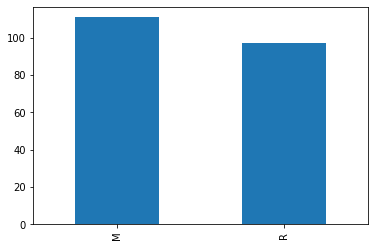

In [38]:
sonar_data[60].value_counts().plot(kind = 'bar')
plt.show()

‘M‘ represents mines, and ‘R‘ represents rocks. Both are almost similar in numbers. Now, let us group this data of mines and rocks through the mean function.

In [39]:
#grouping the data by mine and rock
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [40]:
#separating data and labels
X = sonar_data.drop(columns = 60, axis = 1)
Y = sonar_data[60]

### **Training and Testing Data**



In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=42)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


### **Model Training Using Logistic Regression**

In [43]:
model = LogisticRegression()

In [44]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

### **Model Evaluation**

In [45]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) 

In [46]:
print("Accuracy on training data :", training_data_accuracy)

Accuracy on training data : 0.8235294117647058


In [47]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [48]:
print("Accuracy on testing data :", test_data_accuracy)

Accuracy on testing data : 0.8571428571428571


### **Making a Predictive System**

In [49]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')

['M']
The object is a mine
